References:

https://github.com/yunjey/pytorch-tutorial 

https://medium.com/coinmonks/create-a-neural-network-in-pytorch-and-make-your-life-simpler-ec5367895199

In [1]:
import torch, torch.nn as nn, copy, timeit, numpy.random as npr, numpy as np
from torch.distributions.bernoulli import Bernoulli 
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import plot, show, legend
from scipy.stats import uniform

#### Define number of layers and number of nodes per layer:

In [2]:
n_in = 2
n_h1 = 20
n_h2 = 20
n_h3 = 20
n_out = 2

#### Define model:

In [3]:
model = nn.Sequential(nn.Linear(n_in, n_h1),
                      nn.Tanh(),
                      nn.Linear(n_h1, n_h2),
                      nn.Tanh(),
                      nn.Linear(n_h2, n_h3),
                      nn.Tanh(),
                      nn.Linear(n_h3, n_out))

In [4]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=20, bias=True)
  (1): Tanh()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): Tanh()
  (4): Linear(in_features=20, out_features=20, bias=True)
  (5): Tanh()
  (6): Linear(in_features=20, out_features=2, bias=True)
)


#### Simulate some data:

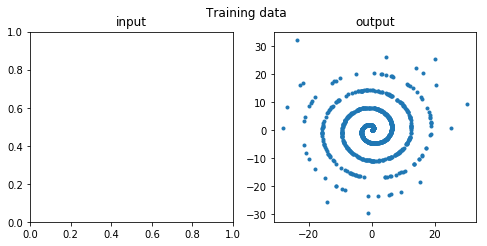

In [5]:
nobs = 1_000
x = 10*torch.randn(nobs, 1)
y = np.zeros((nobs, n_out))
for i in range(nobs) :
    #y[i] = y[i]/10 + y[i]/np.linalg.norm(y[i])
    y[:,0] = list(abs(x)*np.cos(abs(x)))
    y[:,1] = list(abs(x)*np.sin(abs(x)))
y = torch.from_numpy(y).float()
    
plt.figure(figsize=(8,3.5))
plt.subplot(121)
# plt.plot(list(x[:,0]),list(x[:,1]), 'o')   
plt.title("input")
plt.subplot(122)
plt.plot(list(y[:,0]),list(y[:,1]), 'o', markersize=3)   
plt.title("output")
plt.suptitle("Training data");

#### Randomly initialise model weights:

In [6]:
def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight)

def init_uniform(m):
    if type(m) == nn.Linear:
        nn.init.uniform_(m.weight)

# use the modules apply function to recursively apply the initialization
model.apply(init_normal)
# model.apply(init_uniform)

Sequential(
  (0): Linear(in_features=2, out_features=20, bias=True)
  (1): Tanh()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): Tanh()
  (4): Linear(in_features=20, out_features=20, bias=True)
  (5): Tanh()
  (6): Linear(in_features=20, out_features=2, bias=True)
)

In [7]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

#### Optimize:

In [8]:
inpt = torch.zeros(nobs, 2)
inpt[:,0] = x[:,0]
inpt[:,0] = (x**2)[:,0]

In [9]:
for epoch in range(500_000):
    # Forward Propagation
    y_pred = model(inpt)
    # Compute and print loss
    loss = criterion(y_pred, y)
    if (epoch+1)%20_000 == 0 :
        print('epoch: ', epoch+1,' loss: ', loss.item())
    # Zero the gradients
    optimizer.zero_grad()
    
    # perform a backward pass (backpropagation)
    loss.backward()
    
    # Update the parameters
    optimizer.step()

epoch:  20000  loss:  48.84021759033203
epoch:  40000  loss:  49.79540252685547
epoch:  60000  loss:  48.46836853027344
epoch:  80000  loss:  48.10993576049805
epoch:  100000  loss:  51.14992141723633
epoch:  120000  loss:  50.88246536254883
epoch:  140000  loss:  49.357032775878906
epoch:  160000  loss:  50.37677001953125
epoch:  180000  loss:  51.14044952392578
epoch:  200000  loss:  49.47092056274414
epoch:  220000  loss:  48.99229431152344
epoch:  240000  loss:  47.64268112182617
epoch:  260000  loss:  49.97085952758789
epoch:  280000  loss:  49.270015716552734
epoch:  300000  loss:  49.34940719604492
epoch:  320000  loss:  51.149776458740234
epoch:  340000  loss:  51.14671325683594
epoch:  360000  loss:  51.13840103149414
epoch:  380000  loss:  50.573211669921875
epoch:  400000  loss:  49.939395904541016
epoch:  420000  loss:  50.71155548095703
epoch:  440000  loss:  51.16303253173828
epoch:  460000  loss:  51.16246795654297
epoch:  480000  loss:  51.249168395996094
epoch:  500000

In [10]:
plt.figure(figsize=(5,5))
plt.plot(list(model(x)[:,0]),list(model(x)[:,1]), 'bo', label="predicted", markersize=3)
plt.plot(list(y[:,0]),list(y[:,1]), 'ro', label="observed", markersize=3)
# plt.plot(list(model(x_)[:,0]),list(model(x_)[:,1]), 'go', label="new input", markersize=3)
plt.legend()
plt.grid(True)

RuntimeError: size mismatch, m1: [1000 x 1], m2: [2 x 20] at /pytorch/aten/src/TH/generic/THTensorMath.cpp:940

<Figure size 360x360 with 0 Axes>